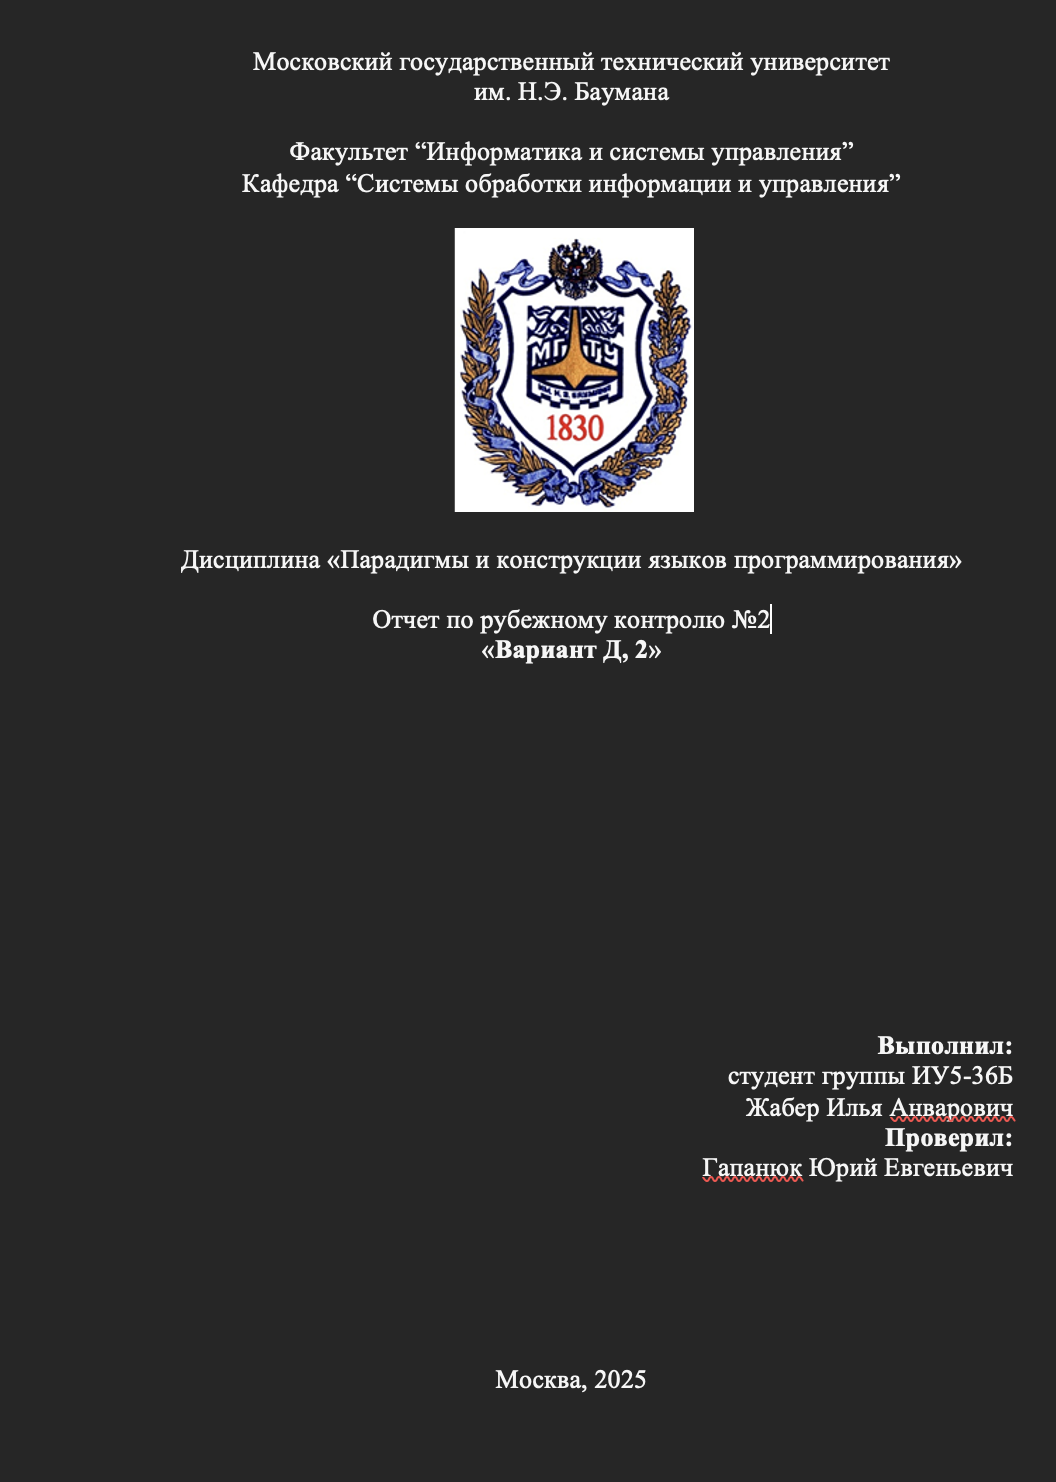

In [ ]:
class SchoolClass:
    def __init__(self, class_id, name):
        self.class_id = class_id
        self.name = name


class Student:
    def __init__(self, student_id, last_name, grade, class_id):
        self.student_id = student_id
        self.last_name = last_name
        self.grade = grade
        self.class_id = class_id


class StudentInClass:
    def __init__(self, student_id, class_id):
        self.student_id = student_id
        self.class_id = class_id


# ===== ДАННЫЕ =====

def get_classes():
    return [
        SchoolClass(1, "10А"),
        SchoolClass(2, "11Б"),
        SchoolClass(3, "9А"),
        SchoolClass(4, "10Б"),
    ]


def get_students():
    return [
        Student(1, "Иванов", 85, 1),
        Student(2, "Петров", 92, 1),
        Student(3, "Сидоров", 78, 2),
        Student(4, "Кузнецов", 88, 3),
        Student(5, "Алексеев", 95, 4),
        Student(6, "Смирнов", 76, 2),
    ]


def get_links():
    return [
        StudentInClass(1, 1),
        StudentInClass(2, 1),
        StudentInClass(3, 2),
        StudentInClass(4, 3),
        StudentInClass(5, 4),
        StudentInClass(6, 2),
        StudentInClass(1, 2),
        StudentInClass(4, 1),
    ]


# ===== ЛОГИКА (ЗАПРОСЫ) =====

def students_with_ov(students, classes):
    result = []

    for student in students:
        if student.last_name.endswith("ов"):
            class_name = next(
                c.name for c in classes if c.class_id == student.class_id
            )
            result.append((student.last_name, class_name))

    return result



def average_grade_by_class(students, classes):
    grades = {}

    for student in students:
        grades.setdefault(student.class_id, []).append(student.grade)

    result = []
    for class_id, values in grades.items():
        class_name = next(c.name for c in classes if c.class_id == class_id)
        avg = round(sum(values) / len(values), 1)
        result.append((class_name, avg))

    return sorted(result, key=lambda x: x[1])


def classes_with_A_students(students, classes, links):
    result = []

    for school_class in classes:
        if school_class.name.endswith("А"):
            student_ids = {
                link.student_id
                for link in links
                if link.class_id == school_class.class_id
            }

            class_students = [
                student for student in students
                if student.student_id in student_ids
            ]

            result.append((school_class.name, class_students))

    return result


In [ ]:
import unittest
from school import (
    get_students,
    get_classes,
    get_links,
    students_with_ov,
    average_grade_by_class,
    classes_with_A_students
)


class TestSchoolQueries(unittest.TestCase):

    def setUp(self):
        self.students = get_students()
        self.classes = get_classes()
        self.links = get_links()

    # ТЕСТ 1
    def test_students_with_ov(self):
        result = students_with_ov(self.students, self.classes)
        expected = {
            ("Иванов", "10А"),
            ("Петров", "10А"),
            ("Сидоров", "11Б"),
            ("Смирнов", "11Б"),
            ("Кузнецов", "9А"),
        }
        self.assertEqual(set(result), expected)



    # ТЕСТ 2
    def test_average_grade_by_class(self):
        result = average_grade_by_class(self.students, self.classes)
        self.assertIn(("11Б", 77.0), result)
        self.assertIn(("9А", 88.0), result)
        self.assertIn(("10А", 88.5), result)
        self.assertIn(("10Б", 95.0), result)

    # ТЕСТ 3
    def test_classes_with_A_students(self):
        result = classes_with_A_students(self.students, self.classes, self.links)

        class_names = [item[0] for item in result]
        self.assertIn("10А", class_names)
        self.assertIn("9А", class_names)


if __name__ == "__main__":
    unittest.main()
